### More Time Series in Pandas

.to_datetime()
.date_range()

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
flights = sns.load_dataset('flights')

In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


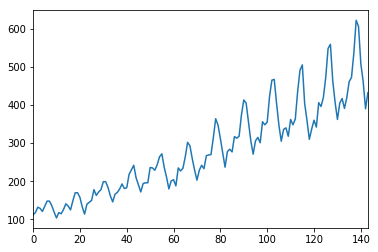

In [5]:
flights['passengers'].plot()

In [6]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [7]:
flights['date'] = flights['year'].astype(str) + '-' + flights['month'].astype(str)

In [8]:
flights['datetime'] = pd.to_datetime(flights['date'])

In [9]:
flights.set_index('datetime', inplace=True)

In [10]:
# flights['1950':'march 1954']

In [11]:
# flights.drop(['year', 'month', 'date'], axis=1, inplace=True)
flights = flights[['passengers']]

### Resampling

- *Upsampling*
    - *increasing observations; increasing granularity*

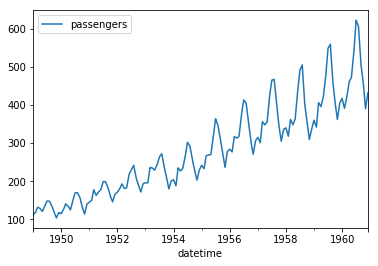

In [12]:
flights.resample('d').interpolate('linear').plot()

- *Downsampling*
    - *reduce oberservations, reduce granularity, aggregrate*

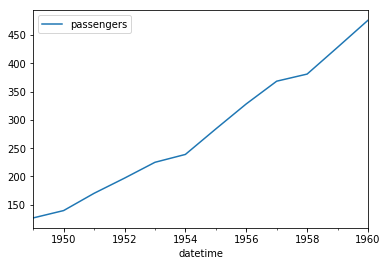

In [13]:
flights.resample('y').mean().plot()

In [14]:
flights.resample('y').mean()

,passengers
datetime,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


*Rolling mean*

In [15]:
flights['passengers rolling mean'] = flights['passengers'].rolling(12).mean()

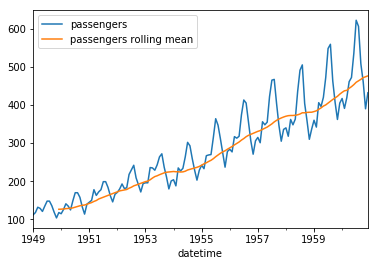

In [16]:
flights.plot()

# Time shifting

### The motive for time-shifting is that we need to train our model on PAST data!!

In [17]:
flights['passengers - 12months'] = flights['passengers'].shift(12)

In [18]:
flights['passengers rolling mean - 12months'] = flights['passengers rolling mean'].shift(12)

In [19]:
flights.dropna(inplace=True)

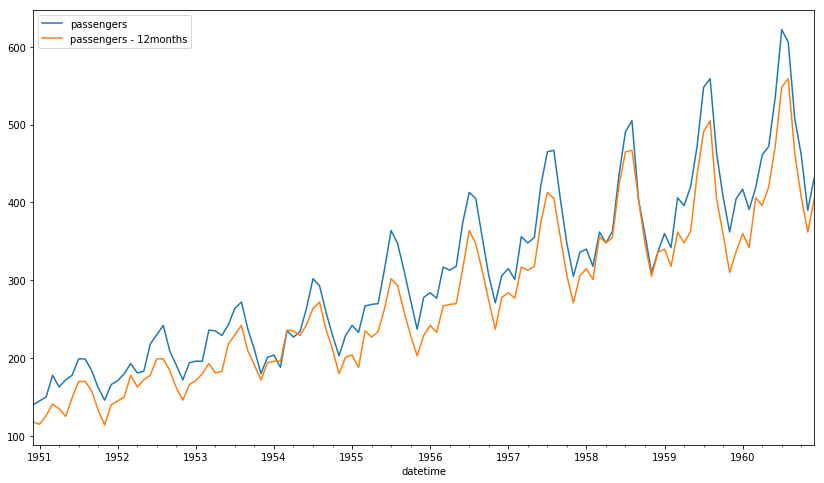

In [20]:
flights[['passengers', 'passengers - 12months']].plot(figsize=(14,8))

In [25]:
features = ['passengers - 12months', 'passengers rolling mean - 12months']

### In a multivariate time series analysis, I'm free to use literally any features that I want (of course, assuming that there are no NAs and strings).... AS LONG AS they are shifted from values in the past.

In [26]:
flights.shape

(121, 4)

In [30]:
X_train = flights[:90][features]
X_test = flights[90:][features]

y_train = flights[:90]['passengers']
y_test = flights[90:]['passengers']

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 2), (90,), (31, 2), (31,))

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
m = LinearRegression()

In [41]:
m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
m.score(X_train, y_train)

0.9660983738366989

In [43]:
m.score(X_test, y_test)

0.9253749650523544

In [45]:
ypred = m.predict(X_test)

In [48]:
prediction = pd.DataFrame(data = ypred, index=y_test.index)

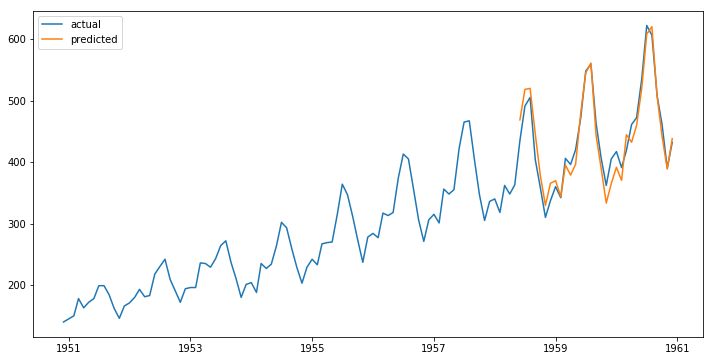

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(flights['passengers'])
plt.plot(prediction)
plt.legend(['actual', 'predicted'])


### Statsmodels

- ARIMA (autoregressive integrated moving average)
- Holt-Winters Exponential Smoothing
- Facebook Prophet
- SARIMA
- SARIMAX (anything that ends in X means external features)
- Customized time-shifted models (Linear Regression, Ridge, Lasso)
- Recurrent Neural Networks (e.g. Long-Short-Term-Memory (LSTM))